In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "nsc2021"

In [2]:
library(MASS)
library(lmtest)
library(car)
library(tseries)
library(tidyverse)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
data=read.csv('../input/nsc2021/dataset.csv', sep=";")

In [4]:
data

negara,tahun,wisman,tukar,pdb,penduduk,bvks,ihk,ahh,pe,impor
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Bangladesh,2015,16612,160.3300,1238.38700,1200.402000,0,144.55890,71.51400,6.552640,59470951
Burma,2015,40635,12.3300,1138.99200,80.665040,0,129.32270,65.81000,6.992840,160418362
Brunei Darussalam,2015,18304,9751.1900,79.22998,78.731310,0,99.94112,75.31800,-0.392380,131437232
China,2015,1260700,2130.6105,146.05760,145.492100,1,114.92210,75.92800,7.041329,29410887144
Denmark,2015,28020,1992.4230,135.35330,142.087100,1,107.13330,80.70244,2.342591,201302936
Austria,2015,22791,14870.3900,104.61530,104.734600,1,110.68860,81.19024,1.014502,316176425
Finland,2015,19029,14870.3900,18.03011,18.030110,1,108.78950,81.48049,0.543659,534092089
France,2015,212575,14870.3900,121.67510,121.536700,1,105.57900,82.32195,1.112912,1336934556
Germany,2015,203611,14870.3900,234.15370,234.153000,1,107.19920,80.64146,1.491932,3471690503


In [5]:
library(ggplot2)

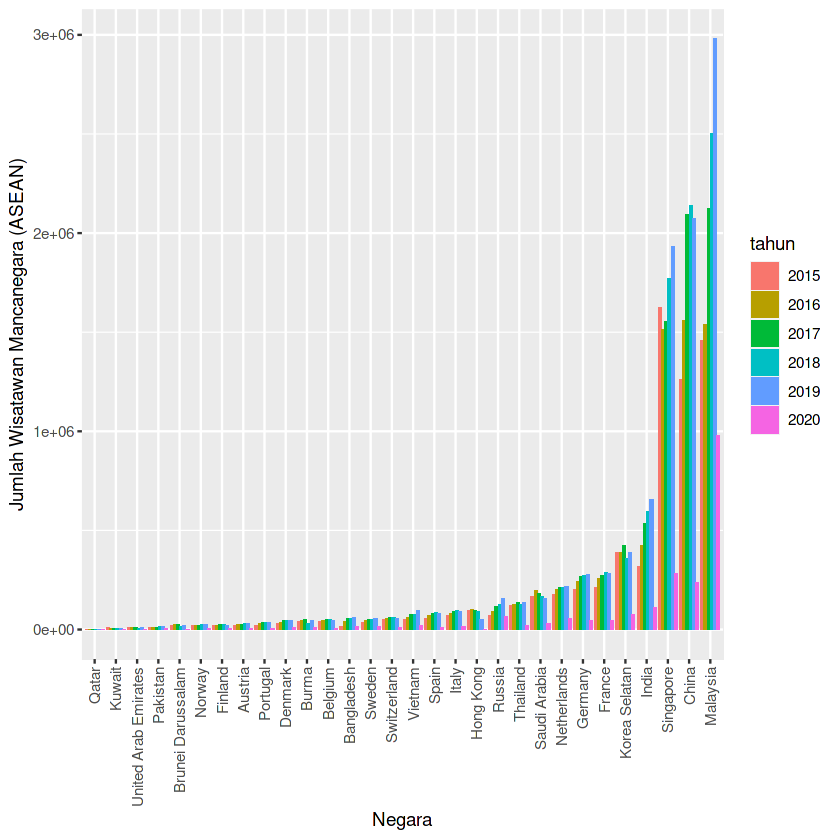

In [6]:
ggplot(data,aes(y=wisman,x=reorder(negara, wisman),fill=factor(tahun)))+geom_bar(position = 'dodge',stat='identity')+labs(x='Negara',y='Jumlah Wisatawan Mancanegara (ASEAN)',fill='tahun')+theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust = 1))

In [7]:
summary(data)

    negara              tahun          wisman            tukar         
 Length:180         Min.   :2015   Min.   :    225   Min.   :    0.52  
 Class :character   1st Qu.:2016   1st Qu.:  19576   1st Qu.:  427.49  
 Mode  :character   Median :2018   Median :  50899   Median : 3646.80  
                    Mean   :2018   Mean   : 245086   Mean   : 8189.45  
                    3rd Qu.:2019   3rd Qu.: 168263   3rd Qu.:14870.39  
                    Max.   :2020   Max.   :2980753   Max.   :47367.10  
      pdb              penduduk             bvks             ihk        
 Min.   :   14.21   Min.   :   8.799   Min.   :0.0000   Min.   : 97.75  
 1st Qu.: 2074.79   1st Qu.:  93.215   1st Qu.:1.0000   1st Qu.:109.99  
 Median :27876.88   Median : 145.639   Median :1.0000   Median :113.59  
 Mean   :27941.42   Mean   : 694.035   Mean   :0.8833   Mean   :122.79  
 3rd Qu.:46677.98   3rd Qu.: 271.101   3rd Qu.:1.0000   3rd Qu.:125.12  
 Max.   :86601.56   Max.   :8044.526   Max.   :1.0000   Ma

# Cek Data

In [8]:
data %>% group_by(negara) %>% summarize(length(negara))

negara,length(negara)
<chr>,<int>
Austria,6
Bangladesh,6
Belgium,6
Brunei Darussalam,6
Burma,6
China,6
Denmark,6
Finland,6
France,6


In [9]:
str(data)

'data.frame':	180 obs. of  11 variables:
 $ negara  : chr  "Bangladesh" "Burma" "Brunei Darussalam" "China" ...
 $ tahun   : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ wisman  : int  16612 40635 18304 1260700 28020 22791 19029 212575 203611 319608 ...
 $ tukar   : num  160.3 12.3 9751.2 2130.6 1992.4 ...
 $ pdb     : num  1238.4 1139 79.2 146.1 135.4 ...
 $ penduduk: num  1200.4 80.7 78.7 145.5 142.1 ...
 $ bvks    : int  0 0 0 1 1 1 1 1 1 0 ...
 $ ihk     : num  144.6 129.3 99.9 114.9 107.1 ...
 $ ahh     : num  71.5 65.8 75.3 75.9 80.7 ...
 $ pe      : num  6.553 6.993 -0.392 7.041 2.343 ...
 $ impor   : num  5.95e+07 1.60e+08 1.31e+08 2.94e+10 2.01e+08 ...


In [10]:
cat_col=c(7)
data[cat_col]=lapply(data[cat_col],as.factor)
num_col=c(3:6, 8:11)
data[num_col]=lapply(data[num_col],scale)
data

negara,tahun,wisman,tukar,pdb,penduduk,bvks,ihk,ahh,pe,impor
<chr>,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Bangladesh,2015,-0.43458918,-0.8355926,-1.1007511,0.2749676,0,0.977749732,-1.3165082,1.324381170,-0.47789760
Burma,2015,-0.38889400,-0.8509950,-1.1048483,-0.3330723,0,0.293452814,-2.4342735,1.447167588,-0.46427313
Brunei Darussalam,2015,-0.43137076,0.1625311,-1.1485338,-0.3341223,0,-1.026149492,-0.5710700,-0.612815841,-0.46818460
China,2015,1.93184391,-0.6305449,-1.1457790,-0.2978699,1,-0.353315160,-0.4515334,1.460692782,3.48354732
Denmark,2015,-0.41288954,-0.6449261,-1.1462203,-0.2997188,1,-0.703130195,0.4840739,0.150058513,-0.45875510
Austria,2015,-0.42283584,0.6952877,-1.1474874,-0.3200020,1,-0.543452531,0.5796640,-0.220389670,-0.44325108
Finland,2015,-0.42999170,0.6952877,-1.1510566,-0.3670843,1,-0.628745995,0.6365418,-0.351723439,-0.41383986
France,2015,-0.06183956,0.6952877,-1.1467841,-0.3108781,1,-0.772937805,0.8014357,-0.192939849,-0.30548338
Germany,2015,-0.07889037,0.6952877,-1.1421475,-0.2497252,1,-0.700170457,0.4721241,-0.087218568,-0.01736378


# Panel Regression Analysis

In [11]:
#Model 1
lm1=lm(wisman~tukar+pdb+penduduk+bvks+ihk+ahh+pe+impor, data=data)
summary(lm1)


Call:
lm(formula = wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + 
    pe + impor, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0567 -0.2476 -0.0719  0.0820  4.7483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13905    0.18322  -0.759   0.4489    
tukar        0.02748    0.05891   0.467   0.6414    
pdb         -0.01439    0.06902  -0.208   0.8351    
penduduk     0.18011    0.06224   2.894   0.0043 ** 
bvks1        0.15742    0.19906   0.791   0.4302    
ihk         -0.10909    0.08012  -1.362   0.1751    
ahh         -0.12952    0.09811  -1.320   0.1885    
pe           0.11908    0.05802   2.052   0.0417 *  
impor        0.63369    0.05819  10.889   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.691 on 171 degrees of freedom
Multiple R-squared:  0.5439,	Adjusted R-squared:  0.5226 
F-statistic: 25.49 on 8 and 171 DF,  p-value: < 2.2e-16


In [12]:
#Model 2
lm2=lm(wisman~tukar+penduduk+bvks+ihk+ahh+pe+impor, data=data)
summary(lm2)


Call:
lm(formula = wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + 
    impor, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0579 -0.2525 -0.0710  0.0798  4.7544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13279    0.18024  -0.737  0.46229    
tukar        0.02817    0.05865   0.480  0.63158    
penduduk     0.17835    0.06149   2.901  0.00421 ** 
bvks1        0.15033    0.19559   0.769  0.44319    
ihk         -0.10674    0.07911  -1.349  0.17899    
ahh         -0.13498    0.09428  -1.432  0.15403    
pe           0.12046    0.05748   2.096  0.03759 *  
impor        0.63589    0.05707  11.143  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.689 on 172 degrees of freedom
Multiple R-squared:  0.5438,	Adjusted R-squared:  0.5252 
F-statistic: 29.29 on 7 and 172 DF,  p-value: < 2.2e-16


In [13]:
#Model 3
lm3=lm(wisman~penduduk+bvks+ihk+ahh+pe+impor, data=data)
summary(lm3)


Call:
lm(formula = wisman ~ penduduk + bvks + ihk + ahh + pe + impor, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0525 -0.2450 -0.0673  0.0707  4.7453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13918    0.17935  -0.776  0.43879    
penduduk     0.17729    0.06131   2.892  0.00432 ** 
bvks1        0.15756    0.19457   0.810  0.41917    
ihk         -0.11452    0.07726  -1.482  0.14007    
ahh         -0.13295    0.09397  -1.415  0.15893    
pe           0.11581    0.05654   2.048  0.04203 *  
impor        0.63144    0.05618  11.239  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6875 on 173 degrees of freedom
Multiple R-squared:  0.5432,	Adjusted R-squared:  0.5273 
F-statistic: 34.29 on 6 and 173 DF,  p-value: < 2.2e-16


In [14]:
#Model 4
lm4=lm(wisman~penduduk+ihk+ahh+pe+impor, data=data)
summary(lm4)


Call:
lm(formula = wisman ~ penduduk + ihk + ahh + pe + impor, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0776 -0.2255 -0.0714  0.0698  4.7696 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.006e-17  5.119e-02   0.000  1.00000    
penduduk     1.634e-01  5.881e-02   2.779  0.00606 ** 
ihk         -1.070e-01  7.662e-02  -1.396  0.16446    
ahh         -9.812e-02  8.347e-02  -1.176  0.24139    
pe           1.147e-01  5.646e-02   2.031  0.04378 *  
impor        6.403e-01  5.506e-02  11.629  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6868 on 174 degrees of freedom
Multiple R-squared:  0.5415,	Adjusted R-squared:  0.5283 
F-statistic: 41.09 on 5 and 174 DF,  p-value: < 2.2e-16


In [15]:
#Model 5
lm5=lm(wisman~penduduk+ihk+pe+impor, data=data)
summary(lm5)


Call:
lm(formula = wisman ~ penduduk + ihk + pe + impor, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1364 -0.1946 -0.0930  0.0542  4.7843 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.267e-17  5.125e-02   0.000   1.0000    
penduduk     1.331e-01  5.290e-02   2.516   0.0128 *  
ihk         -4.119e-02  5.240e-02  -0.786   0.4328    
pe           1.348e-01  5.387e-02   2.502   0.0133 *  
impor        6.497e-01  5.452e-02  11.916   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6876 on 175 degrees of freedom
Multiple R-squared:  0.5378,	Adjusted R-squared:  0.5273 
F-statistic: 50.91 on 4 and 175 DF,  p-value: < 2.2e-16


In [16]:
#Model 6
lm6=lm(wisman~penduduk+pe+impor, data=data)
summary(lm6)


Call:
lm(formula = wisman ~ penduduk + pe + impor, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1661 -0.2179 -0.0696  0.0548  4.7891 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.471e-17  5.119e-02   0.000   1.0000    
penduduk    1.308e-01  5.277e-02   2.479   0.0141 *  
pe          1.269e-01  5.287e-02   2.400   0.0174 *  
impor       6.539e-01  5.421e-02  12.063   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6868 on 176 degrees of freedom
Multiple R-squared:  0.5362,	Adjusted R-squared:  0.5283 
F-statistic: 67.82 on 3 and 176 DF,  p-value: < 2.2e-16


In [17]:
#Model 7
lm7=lm(wisman~penduduk+pe+impor+0, data=data)
summary(lm7)


Call:
lm(formula = wisman ~ penduduk + pe + impor + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1661 -0.2179 -0.0696  0.0548  4.7891 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
penduduk  0.13081    0.05262   2.486   0.0138 *  
pe        0.12691    0.05272   2.407   0.0171 *  
impor     0.65390    0.05405  12.097   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6849 on 177 degrees of freedom
Multiple R-squared:  0.5362,	Adjusted R-squared:  0.5283 
F-statistic: 68.21 on 3 and 177 DF,  p-value: < 2.2e-16


# Hausmann Test

Hausmann Test
Hipotesis :

**$𝐻_0$**  : Terdapat efek acak pada model panel

**$𝐻_1$**  : Tidak terdapat efek acak pada model panel

In [18]:
library(plm)


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




In [19]:
gf1=plm(wisman~tukar+pdb+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr1=plm(wisman~tukar+pdb+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf1,gr1)


	Hausman Test

data:  wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + pe + impor
chisq = 3.3445, df = 8, p-value = 0.9109
alternative hypothesis: one model is inconsistent


In [20]:
gf2=plm(wisman~tukar+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr2=plm(wisman~tukar+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf2,gr2)


	Hausman Test

data:  wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + impor
chisq = 3.3012, df = 7, p-value = 0.8558
alternative hypothesis: one model is inconsistent


In [21]:
gf3=plm(wisman~penduduk+bvks+ihk+ahh+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr3=plm(wisman~penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf3,gr3)


	Hausman Test

data:  wisman ~ penduduk + bvks + ihk + ahh + pe + impor
chisq = 3.5386, df = 6, p-value = 0.7388
alternative hypothesis: one model is inconsistent


In [22]:
gf4=plm(wisman~penduduk+ihk+ahh+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr4=plm(wisman~penduduk+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf4,gr4)


	Hausman Test

data:  wisman ~ penduduk + ihk + ahh + pe + impor
chisq = 3.3658, df = 5, p-value = 0.6438
alternative hypothesis: one model is inconsistent


In [23]:
gf5=plm(wisman~penduduk+ihk+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr5=plm(wisman~penduduk+ihk+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf5,gr5)


	Hausman Test

data:  wisman ~ penduduk + ihk + pe + impor
chisq = 1.9079, df = 4, p-value = 0.7527
alternative hypothesis: one model is inconsistent


In [24]:
gf6=plm(wisman~penduduk+pe+impor,data=data,model="within",index=c("negara","tahun"))
gr6=plm(wisman~penduduk+pe+impor,data=data,model="random",index=c("negara","tahun"))
phtest(gf6,gr6)


	Hausman Test

data:  wisman ~ penduduk + pe + impor
chisq = 0.32968, df = 3, p-value = 0.9544
alternative hypothesis: one model is inconsistent


In [25]:
gf7=plm(wisman~penduduk+pe+impor+0,data=data,model="within",index=c("negara","tahun"))
gr7=plm(wisman~penduduk+pe+impor+0,data=data,model="random",index=c("negara","tahun"))
phtest(gf7,gr7)


	Hausman Test

data:  wisman ~ penduduk + pe + impor + 0
chisq = 0.32174, df = 3, p-value = 0.9559
alternative hypothesis: one model is inconsistent


# Breusch-Pagan Test

Hipotesis :

$𝐻_0$  : Tidak terdapat efek kali-silang maupun waktu

$𝐻^𝐶_0$  : Tidak terdapat efek kali-silang

$𝐻^𝑑_0$  : Tidak terdapat efek waktu

In [26]:
#Model 1
plmtest(gr1,effect="twoways",type="bp")
plmtest(gr1,effect="individual",type="bp")
plmtest(gr1,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + pe + impor
chisq = 206.77, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + pe + impor
chisq = 205.63, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.1442, df = 1, p-value = 0.2848
alternative hypothesis: significant effects


In [27]:
#Model 2
plmtest(gr2,effect="twoways",type="bp")
plmtest(gr2,effect="individual",type="bp")
plmtest(gr2,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + impor
chisq = 207.64, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + impor
chisq = 206.34, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.2939, df = 1, p-value = 0.2553
alternative hypothesis: significant effects


In [28]:
#Model 3
plmtest(gr3,effect="twoways",type="bp")
plmtest(gr3,effect="individual",type="bp")
plmtest(gr3,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ penduduk + bvks + ihk + ahh + pe + impor
chisq = 207.32, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ penduduk + bvks + ihk + ahh + pe + impor
chisq = 206.08, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.2345, df = 1, p-value = 0.2665
alternative hypothesis: significant effects


In [29]:
#Model 4
plmtest(gr4,effect="twoways",type="bp")
plmtest(gr4,effect="individual",type="bp")
plmtest(gr4,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ penduduk + ihk + ahh + pe + impor
chisq = 205.73, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ penduduk + ihk + ahh + pe + impor
chisq = 204.8, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ penduduk + ihk + ahh + pe + impor
chisq = 0.92784, df = 1, p-value = 0.3354
alternative hypothesis: significant effects


In [30]:
#Model 5
plmtest(gr5,effect="twoways",type="bp")
plmtest(gr5,effect="individual",type="bp")
plmtest(gr5,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ penduduk + ihk + pe + impor
chisq = 210.62, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ penduduk + ihk + pe + impor
chisq = 209.35, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ penduduk + ihk + pe + impor
chisq = 1.268, df = 1, p-value = 0.2601
alternative hypothesis: significant effects


In [31]:
#Model 6
plmtest(gr6,effect="twoways",type="bp")
plmtest(gr6,effect="individual",type="bp")
plmtest(gr6,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ penduduk + pe + impor
chisq = 212.45, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ penduduk + pe + impor
chisq = 211.23, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ penduduk + pe + impor
chisq = 1.223, df = 1, p-value = 0.2688
alternative hypothesis: significant effects


In [32]:
#Model 7
plmtest(gr7,effect="twoways",type="bp")
plmtest(gr7,effect="individual",type="bp")
plmtest(gr7,effect="time",type="bp")


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan) for
	balanced panels

data:  wisman ~ penduduk + pe + impor + 0
chisq = 212.45, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  wisman ~ penduduk + pe + impor + 0
chisq = 211.23, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  wisman ~ penduduk + pe + impor + 0
chisq = 1.223, df = 1, p-value = 0.2688
alternative hypothesis: significant effects


# Estimasi Model Wald Test

Model 1

In [33]:
#Model 1
g1=plm(wisman~tukar+pdb+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g1)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ tukar + pdb + penduduk + bvks + ihk + 
    ahh + pe + impor, data = data, effect = "twoways", model = "random", 
    random.method = "amemiya", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                  var std.dev share
idiosyncratic  0.1379  0.3714 0.009
individual    14.9676  3.8688 0.990
time           0.0103  0.1015 0.001
theta: 0.9608 (id) 0.4445 (time) 0.4444 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.522470 -0.065221 -0.023584  0.055727  2.015007 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.0931058  0.6774940 -0.1374  0.890694    
tukar        0.2659318  0.4400292  0.6044  0.545611    
pdb         -0.0056831  0.0594022 -0.0957  0.923781    
penduduk    -0.0157138  0.6507573 -0.0241  0.980735    
bvks1        0.1054027  0.1451625  0.7261  0.467776    
ihk          0.1062225

In [34]:
#Model 1a
g1a=plm(wisman~tukar+pdb+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g1a)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ tukar + pdb + bvks + ihk + ahh + pe + 
    impor, data = data, effect = "twoways", model = "random", 
    random.method = "amemiya", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                  var std.dev share
idiosyncratic 0.13925 0.37316 0.148
individual    0.79358 0.89083 0.842
time          0.01018 0.10087 0.011
theta: 0.8314 (id) 0.4403 (time) 0.4353 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.630718 -0.085079 -0.029785  0.043278  2.377106 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept) -9.9307e-02  2.1047e-01 -0.4718   0.63705    
tukar        7.9467e-02  1.6627e-01  0.4779   0.63270    
pdb         -3.3297e-05  5.9731e-02 -0.0006   0.99956    
bvks1        1.1242e-01  1.4717e-01  0.7639   0.44492    
ihk          5.3953e-02  9.6182e-02  0.5609   0.57483    
ahh         -6.4721e-

In [35]:
#Model 1b
g1b=plm(wisman~tukar+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g1b)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ tukar + bvks + ihk + ahh + pe + impor, 
    data = data, effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                  var std.dev share
idiosyncratic 0.13933 0.37326 0.147
individual    0.79979 0.89431 0.842
time          0.01075 0.10367 0.011
theta: 0.832 (id) 0.4507 (time) 0.4455 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.628689 -0.085237 -0.029872  0.044049  2.374788 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.098797   0.210415 -0.4695   0.63869    
tukar        0.079554   0.166054  0.4791   0.63188    
bvks1        0.111845   0.146712  0.7623   0.44585    
ihk          0.054146   0.095088  0.5694   0.56906    
ahh         -0.064466   0.127544 -0.5054   0.61325    
pe           0.112250   0.044750  2.5084   0.0

In [36]:
#Model 1c
g1c=plm(wisman~bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g1c)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ bvks + ihk + ahh + pe + impor, data = data, 
    effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                   var  std.dev share
idiosyncratic 0.140354 0.374638 0.268
individual    0.377249 0.614206 0.721
time          0.005566 0.074607 0.011
theta: 0.7584 (id) 0.3242 (time) 0.3162 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.707437 -0.086625 -0.037510  0.041149  2.584365 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.105226   0.177234 -0.5937  0.552706    
bvks1        0.119124   0.147121  0.8097  0.418114    
ihk          0.026488   0.086770  0.3053  0.760161    
ahh         -0.030203   0.110461 -0.2734  0.784524    
pe           0.120486   0.043140  2.7929  0.005224 ** 
impor        0.673020   0.096333  6.9864 2.82

Model 2

In [37]:
#Model 2
g2=plm(wisman~tukar+penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g2)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ tukar + penduduk + bvks + ihk + ahh + 
    pe + impor, data = data, effect = "twoways", model = "random", 
    random.method = "amemiya", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                   var  std.dev share
idiosyncratic  0.13791  0.37136 0.009
individual    14.55258  3.81479 0.990
time           0.01012  0.10061 0.001
theta: 0.9603 (id) 0.4411 (time) 0.4411 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.523608 -0.065111 -0.020034  0.054538  2.016655 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.093968   0.666509 -0.1410   0.88788    
tukar        0.256306   0.429594  0.5966   0.55076    
penduduk    -0.014799   0.638772 -0.0232   0.98152    
bvks1        0.106379   0.144347  0.7370   0.46114    
ihk          0.107103   0.105429  1.0159   0.30969    
ahh         -0.160421   0.

Model 3

In [38]:
#Model 3
g3=plm(wisman~penduduk+bvks+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g3)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ penduduk + bvks + ihk + ahh + pe + impor, 
    data = data, effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                    var   std.dev share
idiosyncratic  0.138773  0.372523 0.009
individual    15.430633  3.928184 0.991
time           0.005984  0.077360 0.000
theta: 0.9613 (id) 0.3397 (time) 0.3397 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.542054 -0.056286 -0.015779  0.048059  2.016914 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.099009   0.682956 -0.1450  0.884734    
penduduk    -0.034014   0.654288 -0.0520  0.958539    
bvks1        0.112086   0.141834  0.7903  0.429376    
ihk          0.101770   0.102749  0.9905  0.321947    
ahh         -0.166567   0.163841 -1.0166  0.309326    
pe           0.126173   0.

In [39]:
#Model 4
g4=plm(wisman~penduduk+ihk+ahh+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g4)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ penduduk + ihk + ahh + pe + impor, data = data, 
    effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                   var  std.dev share
idiosyncratic 0.139655 0.373705 0.015
individual    9.148735 3.024688 0.984
time          0.006132 0.078308 0.001
theta: 0.9496 (id) 0.3431 (time) 0.343 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.550171 -0.057320 -0.014213  0.038198  2.065976 

Coefficients:
               Estimate  Std. Error z-value Pr(>|z|)    
(Intercept) -3.6518e-16  5.1631e-01  0.0000  1.00000    
penduduk     7.2820e-02  5.0907e-01  0.1430  0.88625    
ihk          1.0844e-01  1.0071e-01  1.0767  0.28161    
ahh         -1.5246e-01  1.6072e-01 -0.9486  0.34283    
pe           1.2616e-01  4.1350e-02  3.0511  0.00228 ** 
impor        6.4241e-01  1.452

In [40]:
#Model 5
g5=plm(wisman~penduduk+ihk+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g5)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ penduduk + ihk + pe + impor, data = data, 
    effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                  var std.dev share
idiosyncratic 0.13997 0.37413 0.015
individual    8.97232 2.99538 0.984
time          0.00778 0.08820 0.001
theta: 0.9491 (id) 0.3877 (time) 0.3876 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.554830 -0.063666 -0.017083  0.044652  2.060868 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) 1.5144e-16 5.1018e-01  0.0000  1.000000    
penduduk    2.9347e-02 5.0097e-01  0.0586  0.953286    
ihk         9.7196e-02 1.0091e-01  0.9632  0.335446    
pe          1.2731e-01 4.1727e-02  3.0509  0.002281 ** 
impor       6.4258e-01 1.4520e-01  4.4256 9.616e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

In [41]:
#Model 5a
g5a=plm(wisman~penduduk+pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g5a)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ penduduk + pe + impor, data = data, effect = "twoways", 
    model = "random", random.method = "amemiya", index = c("negara", 
        "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                   var  std.dev share
idiosyncratic 0.140710 0.375114 0.016
individual    8.744296 2.957076 0.983
time          0.007682 0.087646 0.001
theta: 0.9483 (id) 0.3843 (time) 0.3842 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.547621 -0.064837 -0.019667  0.044502  2.073849 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept) -1.3939e-16  5.0239e-01  0.0000  1.000000    
penduduk     4.0733e-02  4.9355e-01  0.0825  0.934225    
pe           1.1472e-01  3.9419e-02  2.9103  0.003611 ** 
impor        6.5602e-01  1.4436e-01  4.5444 5.509e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:

In [42]:
#Model 5b
g5b=plm(wisman~pe+impor,data=data,model="random",index=c("negara","tahun"),effect="twoways")
summary(g5b)

Twoways effects Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = wisman ~ pe + impor, data = data, effect = "twoways", 
    model = "random", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                    var   std.dev share
idiosyncratic 0.1436744 0.3790440 0.279
individual    0.3698931 0.6081883 0.719
time          0.0009075 0.0301242 0.002
theta: 0.7534 (id) 0.0831 (time) 0.08169 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.736825 -0.086319 -0.040602  0.046046  2.640035 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept) -2.6346e-17  1.1538e-01  0.0000         1    
pe           1.3690e-01  3.4763e-02  3.9382 8.209e-05 ***
impor        6.8214e-01  9.4725e-02  7.2013 5.965e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    36.131
Residual Sum of Squares: 25.494
R-Squared:      0.29439
Adj. R-Squared: 0.28642
C

In [43]:
#Model 5c
g5c=plm(wisman~pe+impor+0,data=data,model="random",index=c("negara","tahun"),effect="twoways")
summary(g5c)

Twoways effects Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = wisman ~ pe + impor + 0, data = data, effect = "twoways", 
    model = "random", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                    var   std.dev share
idiosyncratic 0.1436744 0.3790440 0.279
individual    0.3698931 0.6081883 0.719
time          0.0009075 0.0301242 0.002
theta: 0.7534 (id) 0.0831 (time) 0.08169 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.736825 -0.086319 -0.040602  0.046046  2.640035 

Coefficients:
      Estimate Std. Error z-value  Pr(>|z|)    
pe    0.136903   0.034665  3.9493 7.837e-05 ***
impor 0.682140   0.094458  7.2216 5.138e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    36.131
Residual Sum of Squares: 25.494
R-Squared:      0.29439
Adj. R-Squared: 0.29043
Chisq: 74.2649 on 2 DF, p-value: < 2.22e-16

In [44]:
#Model 6
g6=plm(wisman~penduduk+pe+impor,data=data,model="within",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g6)

Twoways effects Within Model

Call:
plm(formula = wisman ~ penduduk + pe + impor, data = data, effect = "twoways", 
    model = "within", random.method = "amemiya", index = c("negara", 
        "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.403392 -0.078715 -0.022480  0.055312  1.850462 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
penduduk -2.771034   2.783223 -0.9956 0.3211280    
pe        0.057610   0.056261  1.0240 0.3075838    
impor     0.609572   0.167843  3.6318 0.0003922 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    22.735
Residual Sum of Squares: 20.403
R-Squared:      0.10259
Adj. R-Squared: -0.13124
F-statistic: 5.41106 on 3 and 142 DF, p-value: 0.001488

In [45]:
#Model 6a
g6a=plm(wisman~pe+impor,data=data,model="within",index=c("negara","tahun"),effect="twoways")
summary(g6a)

Twoways effects Within Model

Call:
plm(formula = wisman ~ pe + impor, data = data, effect = "twoways", 
    model = "within", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.398032 -0.075466 -0.025097  0.056928  1.861105 

Coefficients:
      Estimate Std. Error t-value  Pr(>|t|)    
pe    0.062461   0.056048  1.1144 0.2669704    
impor 0.621523   0.167408  3.7126 0.0002932 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    22.735
Residual Sum of Squares: 20.545
R-Squared:      0.096326
Adj. R-Squared: -0.13117
F-statistic: 7.62142 on 2 and 143 DF, p-value: 0.0007159

In [46]:
#Model 6b
g6b=plm(wisman~impor,data=data,model="within",index=c("negara","tahun"),effect="twoways")
summary(g6b)

Twoways effects Within Model

Call:
plm(formula = wisman ~ impor, data = data, effect = "twoways", 
    model = "within", index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.368218 -0.075298 -0.028124  0.061304  1.875826 

Coefficients:
      Estimate Std. Error t-value  Pr(>|t|)    
impor  0.62621    0.16750  3.7386 0.0002662 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    22.735
Residual Sum of Squares: 20.724
R-Squared:      0.088477
Adj. R-Squared: -0.13307
F-statistic: 13.9774 on 1 and 144 DF, p-value: 0.00026624

In [47]:
#Model 7
g7=plm(wisman~penduduk+pe+impor+0,data=data,model="within",index=c("negara","tahun"),effect="twoways", random.method='amemiya')
summary(g7)

Twoways effects Within Model

Call:
plm(formula = wisman ~ penduduk + pe + impor + 0, data = data, 
    effect = "twoways", model = "within", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.403392 -0.078715 -0.022480  0.055312  1.850462 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
penduduk -2.771034   2.783223 -0.9956 0.3211280    
pe        0.057610   0.056261  1.0240 0.3075838    
impor     0.609572   0.167843  3.6318 0.0003922 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    22.735
Residual Sum of Squares: 20.403
R-Squared:      0.10259
Adj. R-Squared: -0.13124
F-statistic: 5.41106 on 3 and 142 DF, p-value: 0.001488

# Diagnostic Checking

In [48]:
pbgtest(g1,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ tukar + pdb + penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.7834, df = 2, p-value = 0.41
alternative hypothesis: serial correlation in idiosyncratic errors


In [49]:
pbgtest(g2,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ tukar + penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.7216, df = 2, p-value = 0.4228
alternative hypothesis: serial correlation in idiosyncratic errors


In [50]:
pbgtest(g3,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ penduduk + bvks + ihk + ahh + pe + impor
chisq = 1.8299, df = 2, p-value = 0.4005
alternative hypothesis: serial correlation in idiosyncratic errors


In [51]:
pbgtest(g4,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ penduduk + ihk + ahh + pe + impor
chisq = 1.5162, df = 2, p-value = 0.4686
alternative hypothesis: serial correlation in idiosyncratic errors


In [52]:
pbgtest(g5,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ penduduk + ihk + pe + impor
chisq = 1.3203, df = 2, p-value = 0.5168
alternative hypothesis: serial correlation in idiosyncratic errors


In [53]:
pbgtest(g6,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ penduduk + pe + impor
chisq = 2.9394, df = 2, p-value = 0.23
alternative hypothesis: serial correlation in idiosyncratic errors


In [54]:
pbgtest(g7,order=2)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  wisman ~ penduduk + pe + impor + 0
chisq = 2.9394, df = 2, p-value = 0.23
alternative hypothesis: serial correlation in idiosyncratic errors


In [55]:
coeftest(g1,vcovHC)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.0931058  0.1026159 -0.9073 0.365513   
tukar        0.2659318  0.1632486  1.6290 0.105154   
pdb         -0.0056831  0.0151133 -0.3760 0.707358   
penduduk    -0.0157138  0.1240764 -0.1266 0.899369   
bvks1        0.1054027  0.1418031  0.7433 0.458318   
ihk          0.1062225  0.0795490  1.3353 0.183550   
ahh         -0.1590959  0.0546177 -2.9129 0.004059 **
pe           0.1191152  0.0664383  1.7929 0.074761 . 
impor        0.6455231  0.2534337  2.5471 0.011744 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
coeftest(g2,vcovHC)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.093968   0.102842 -0.9137 0.362149   
tukar        0.256306   0.157567  1.6266 0.105642   
penduduk    -0.014799   0.114931 -0.1288 0.897692   
bvks1        0.106379   0.140906  0.7550 0.451306   
ihk          0.107103   0.078115  1.3711 0.172131   
ahh         -0.160421   0.056630 -2.8328 0.005166 **
pe           0.119810   0.066050  1.8139 0.071432 . 
impor        0.646063   0.252861  2.5550 0.011485 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [57]:
coeftest(g3,vcovHC)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.099009   0.107015 -0.9252  0.35616   
penduduk    -0.034014   0.124067 -0.2742  0.78429   
bvks1        0.112086   0.138276  0.8106  0.41871   
ihk          0.101770   0.078115  1.3028  0.19437   
ahh         -0.166567   0.058565 -2.8441  0.00499 **
pe           0.126173   0.064932  1.9432  0.05362 . 
impor        0.645670   0.250415  2.5784  0.01076 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [58]:
coeftest(g4,vcovHC)


t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)   
(Intercept) -3.6518e-16  1.1753e-01  0.0000 1.000000   
penduduk     7.2820e-02  1.0080e-01  0.7225 0.470987   
ihk          1.0844e-01  8.5810e-02  1.2637 0.208036   
ahh         -1.5246e-01  5.6940e-02 -2.6775 0.008128 **
pe           1.2616e-01  6.4856e-02  1.9453 0.053356 . 
impor        6.4241e-01  2.4536e-01  2.6182 0.009618 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
coeftest(g5,vcovHC)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.5144e-16 1.1104e-01  0.0000  1.00000  
penduduk    2.9347e-02 9.2801e-02  0.3162  0.75220  
ihk         9.7196e-02 8.6481e-02  1.1239  0.26259  
pe          1.2731e-01 6.4882e-02  1.9621  0.05134 .
impor       6.4258e-01 2.5072e-01  2.5630  0.01122 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
coeftest(g6,vcovHC)


t test of coefficients:

          Estimate Std. Error t value Pr(>|t|)   
penduduk -2.771034   0.966003 -2.8686 0.004753 **
pe        0.057610   0.056272  1.0238 0.307677   
impor     0.609572   0.265750  2.2938 0.023271 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
coeftest(g7,vcovHC)


t test of coefficients:

          Estimate Std. Error t value Pr(>|t|)   
penduduk -2.771034   0.966003 -2.8686 0.004753 **
pe        0.057610   0.056272  1.0238 0.307677   
impor     0.609572   0.265750  2.2938 0.023271 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Best Model

Model 3

In [62]:
summary(g3)

Twoways effects Random Effect Model 
   (Amemiya's transformation)

Call:
plm(formula = wisman ~ penduduk + bvks + ihk + ahh + pe + impor, 
    data = data, effect = "twoways", model = "random", random.method = "amemiya", 
    index = c("negara", "tahun"))

Balanced Panel: n = 30, T = 6, N = 180

Effects:
                    var   std.dev share
idiosyncratic  0.138773  0.372523 0.009
individual    15.430633  3.928184 0.991
time           0.005984  0.077360 0.000
theta: 0.9613 (id) 0.3397 (time) 0.3397 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.542054 -0.056286 -0.015779  0.048059  2.016914 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -0.099009   0.682956 -0.1450  0.884734    
penduduk    -0.034014   0.654288 -0.0520  0.958539    
bvks1        0.112086   0.141834  0.7903  0.429376    
ihk          0.101770   0.102749  0.9905  0.321947    
ahh         -0.166567   0.163841 -1.0166  0.309326    
pe           0.126173   0.

In [63]:
# Efek Individu
ranef(g3, type='dmean')

Austria           Bangladesh              Belgium 
          0.03334430          -0.62595014           0.05290875 
   Brunei Darussalam                Burma                China 
         -0.06405046          -0.56082256          -0.68108235 
             Denmark              Finland               France 
          0.03053565           0.01341059           0.40459016 
             Germany            Hong Kong                India 
          0.13613195           0.13076042          -0.21072565 
               Italy        Korea Selatan               Kuwait 
          0.13804251          -0.33683450          -0.23409975 
            Malaysia          Netherlands               Norway 
          2.71462406           0.27636554           0.03874536 
            Pakistan             Portugal                Qatar 
         -0.70369748           0.08861545          -0.11570919 
              Russia         Saudi Arabia            Singapore 
         -0.43511625          -0.23567530           1.48126535 
               Spain               Sweden          Switzerland 
          0.17461187           0.07381683           0.16671484 
            Thailand United Arab Emirates              Vietnam 
         -0.71055474          -0.31195347          -0.72821178